In [125]:
#import necessary packages:

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

import matplotlib as mpl


In [126]:
#input inoculum data
df_inoc = pd.read_excel('data/competition_template.xlsx', sheetname='Initial_Water')
df_inoc

,Competition,Blue,White,notes
0,1,0,0,NaN
1,1,0,0,NaN
2,2,139,118,NaN
3,2,134,124,NaN
4,3,141,166,NaN
5,3,122,154,NaN


In [127]:
#Process inoculum data - remove unecessary columns and calculate White/Blue ratio
del df_inoc['notes']
df_inoc['ratioWB_i'] = df_inoc['White']/df_inoc['Blue']

#Then, average the technical replicates
df_inoc_mean = df_inoc.groupby(['Competition'], as_index=False).mean()
df_inoc_mean

,Competition,Blue,White,ratioWB_i
0,1,0.0,0.0,NaN
1,2,136.5,121.0,0.887147
2,3,131.5,160.0,1.219800


In [128]:
#input the squid cfu data
df_cfu = pd.read_excel('data/competition_template.xlsx', sheetname='Final_Squid')
df_cfu.head(10)

,Competition,Squid,Dilution,Blue,White,notes
0,1,1,A,0,0,NaN
1,1,1,A,0,0,NaN
2,1,2,A,0,0,NaN
3,1,2,A,0,0,NaN
4,1,3,A,0,0,NaN
5,1,3,A,0,0,NaN
6,2,1,B,44,65,NaN
7,2,1,B,43,52,NaN
8,2,2,B,23,25,NaN
9,2,2,B,23,24,NaN


In [129]:
#Delete unecessary notes column
del df_cfu['notes']

In [130]:
#correct data to account for Limit Of Detection:

df_lod = df_cfu

#average technical replicates
df_lod = df_lod.groupby(['Competition','Squid','Dilution'], as_index=False).mean()

#mark all infinite points
df_lod.loc[df_lod['Blue'] != 0, 'Infinite'] = 'n'
df_lod.loc[df_lod['White'] != 0, 'Infinite'] = 'n'
df_lod.loc[df_lod['Blue'] == 0, 'Infinite'] = 'y'
df_lod.loc[df_lod['White'] == 0, 'Infinite'] = 'y'

#set all zeros to 1
df_lod.loc[df_lod['Blue'] == 0, 'Blue'] = 1
df_lod.loc[df_lod['White'] == 0, 'White'] = 1

#calculate white:blue 
df_lod['ratioWB_o'] = df_lod['White']/df_lod['Blue']

#merge inoculum data into table
df_lod = pd.merge(df_lod, df_inoc_mean[['Competition', 'ratioWB_i']], on=['Competition'])

#calculate competive index for each squid
df_lod['CI'] = np.log10(df_lod['ratioWB_o'] / df_lod['ratioWB_i'])

df_lod.head(15)

,Competition,Squid,Dilution,Blue,White,Infinite,ratioWB_o,ratioWB_i,CI
0,1,1,A,1.0,1.0,y,1.000000,NaN,NaN
1,1,2,A,1.0,1.0,y,1.000000,NaN,NaN
2,1,3,A,1.0,1.0,y,1.000000,NaN,NaN
3,2,1,B,43.5,58.5,n,1.344828,0.887147,0.180671
4,2,1,C,0.5,4.5,n,9.000000,0.887147,1.006247
5,2,2,B,23.0,24.5,n,1.065217,0.887147,0.079443
6,2,2,C,0.5,1.0,n,2.000000,0.887147,0.353034
7,2,3,B,20.0,38.5,n,1.925000,0.887147,0.336435
8,2,3,C,0.5,3.0,n,6.000000,0.887147,0.830156
9,2,4,B,76.5,58.0,n,0.758170,0.887147,-0.068229


In [131]:
#calculate medians for each competition
df_lod_medians = df_lod.groupby(['Competition','Dilution'], as_index=False).median()

df_lod_medians

,Competition,Dilution,Squid,Blue,White,ratioWB_o,ratioWB_i,CI
0,1,A,2.0,1.00,1.00,1.000000,NaN,NaN
1,2,B,3.5,33.25,45.50,1.205022,0.887147,0.130057
2,2,C,3.5,0.75,3.75,2.125000,0.887147,0.378611
3,3,B,3.5,36.75,120.50,3.529744,1.219800,0.460923
4,3,C,3.5,2.75,2.75,1.330357,1.219800,0.037435


## Checkpoint
### You know have two dataframes:
1) df_lod - This has the averaged competitive index (CI) for each squid for each dilution  
2) df_lod_medians - This has the median competitive index (CI) for each competition for each dilution

Note: The following code will create a graph using the B dilution information. Still working on code to choose if C dilution should be used instead of B dilution.

In [132]:
#B dilutions only
df_lod_B = df_lod[df_lod.Dilution == 'B']
df_lod_medians_B = df_lod_medians[df_lod_medians.Dilution == 'B']

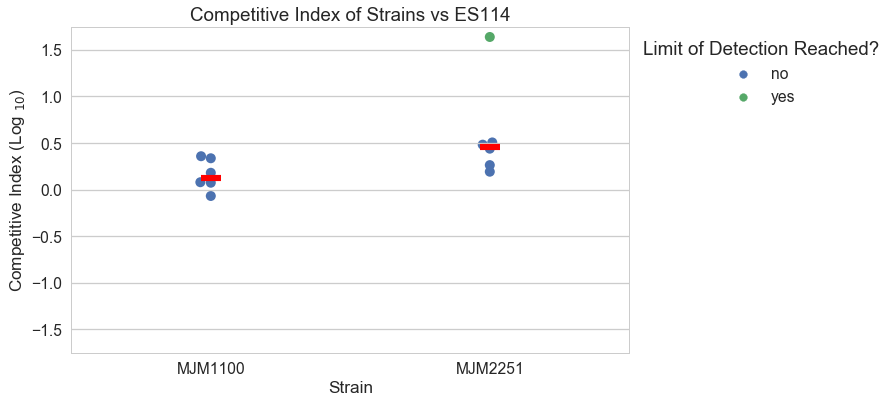

In [139]:
# Create the figure and the axes
fig, ax = plt.subplots(figsize=(10, 6))
sns.set_context("talk", font_scale = 1.2) #sets default bigger and scale up
mpl.rcParams["figure.facecolor"] = "white" #set background of plot area as white
sns.set_style("whitegrid") #set plot background as white


# plot data points
graph = sns.swarmplot(x='Competition', y='CI', data=df_lod_B, 
                      size=10, hue='Infinite', zorder=0)


# plot medians
graph = sns.pointplot(x='Competition', y='CI', data=df_lod_B, errwidth=0, markers='_', 
                      scale=2, join=False, estimator=np.median, color='red')

# graph aesthetics
graph.set(title='Competitive Index of Strains vs ES114', 
          xlabel='Strain', 
          ylabel=r'Competitive Index (Log $_{10}$)',
          ylim=(-1.75,1.75))
graph.set_xticklabels(['MJM1100','MJM2251'])

# Legend
#ax.legend().set_visible(False) #This command will hide legend
graph.legend(bbox_to_anchor=(1, 1), 
             title='Limit of Detection Reached?')
for t, l in zip(graph.legend_.texts, ['no','yes']): t.set_text(l)


# Colors
#### Don't like colors? Here's a way to create your own palette. You can also choose from pre-existing palettes.
https://seaborn.pydata.org/tutorial/color_palettes.html

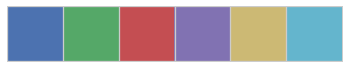

In [140]:
current_palette = sns.color_palette()
sns.palplot(current_palette)

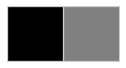

In [141]:
squid_palette = ['black','grey']
sns.palplot(squid_palette)

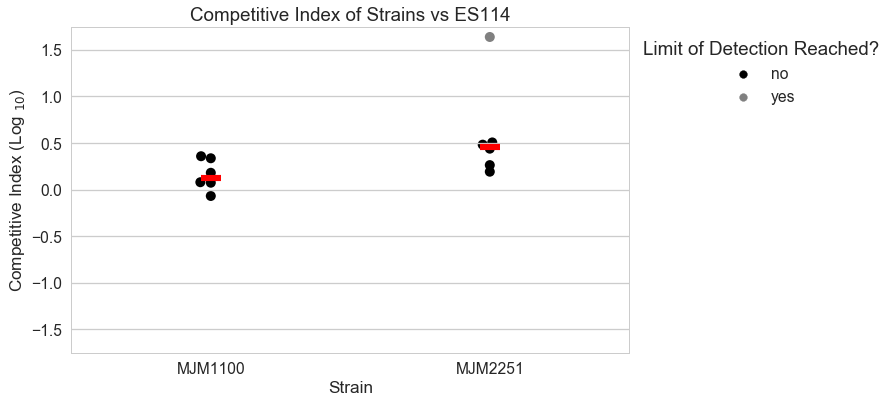

In [143]:
# Add palette to graph

# Create the figure and the axes
fig, ax = plt.subplots(figsize=(10, 6))
sns.set_context("talk", font_scale = 1.2) #sets default bigger and scale up
mpl.rcParams["figure.facecolor"] = "white" #set background of plot area as white
sns.set_style("whitegrid") #set plot background as white


# plot data points
graph = sns.swarmplot(x='Competition', y='CI', data=df_lod_B, 
                      size=10, hue='Infinite', palette = squid_palette, zorder=0)


# plot medians
graph = sns.pointplot(x='Competition', y='CI', data=df_lod_B, errwidth=0, markers='_', 
                      scale=2, join=False, estimator=np.median, color='red')

# graph aesthetics
graph.set(title='Competitive Index of Strains vs ES114', 
          xlabel='Strain', 
          ylabel=r'Competitive Index (Log $_{10}$)',
          ylim=(-1.75,1.75))
graph.set_xticklabels(['MJM1100','MJM2251'])

# Legend
#ax.legend().set_visible(False) #This command will hide legend
graph.legend(bbox_to_anchor=(1, 1), 
             title='Limit of Detection Reached?')
for t, l in zip(graph.legend_.texts, ['no','yes']): t.set_text(l)

In [148]:
#Finally, export your figure!
fig.savefig('results/competition_example_graph.pdf',bbox_inches="tight")